<a href="https://colab.research.google.com/github/Colin-Chua/DataMiningAssig/blob/main/AssignmentDataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Understanding

In [77]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np

In [78]:
DataSet = pd.read_csv("dataset.csv")
print(DataSet);

              ID  travel_fee             departure_time  departure_long  \
0        54:00.0         7.0  2013-07-02 19:54:00+00:00      -74.005360   
1        21:31.0         5.5  2013-09-28 00:21:31+00:00      -74.014165   
2        18:00.0        21.5  2013-06-16 03:18:00+00:00      -73.991075   
3        43:00.0         9.5  2013-07-20 13:43:00+00:00      -74.002662   
4        57:17.0        15.5  2013-11-05 22:57:17+00:00      -73.962397   
...          ...         ...                        ...             ...   
1048570  47:00.0        24.0  2013-12-23 22:47:00+00:00      -73.978935   
1048571  49:00.0         8.5  2013-05-07 19:49:00+00:00      -73.982260   
1048572  14:00.0        11.5  2013-03-04 07:14:00+00:00      -73.969868   
1048573  06:39.0         8.5  2013-11-18 22:06:39+00:00      -74.004478   
1048574  14:00.0        20.0  2013-01-23 21:14:00+00:00      -74.007191   

         departure_lat  arrival_long  arrival_lat  occupancy  
0            40.728867    -74.008913

In [79]:
DataSet.head(10)

,ID,travel_fee,departure_time,departure_long,departure_lat,arrival_long,arrival_lat,occupancy
0,54:00.0,7.0,2013-07-02 19:54:00+00:00,-74.005360,40.728867,-74.008913,40.710907,1
1,21:31.0,5.5,2013-09-28 00:21:31+00:00,-74.014165,40.708941,-74.016310,40.716734,1
2,18:00.0,21.5,2013-06-16 03:18:00+00:00,-73.991075,40.760352,-73.941382,40.713292,1
3,43:00.0,9.5,2013-07-20 13:43:00+00:00,-74.002662,40.723630,-73.991722,40.748905,5
4,57:17.0,15.5,2013-11-05 22:57:17+00:00,-73.962397,40.712705,-73.996834,40.680403,2
5,03:00.0,6.0,2013-09-11 11:03:00+00:00,-73.990240,40.756407,-73.996077,40.764062,1
6,39:00.0,9.5,2013-04-21 14:39:00+00:00,-73.956150,40.787467,-73.981548,40.780837,1
7,37:43.0,12.0,2013-12-07 18:37:43+00:00,-73.976578,40.750400,-73.952335,40.780785,1
8,51:10.0,8.0,2013-06-10 06:51:10+00:00,-73.986934,40.733549,-73.974015,40.754178,1
9,21:00.0,16.5,2013-09-01 17:21:00+00:00,-73.804917,40.680112,-73.789827,40.643207,6


In [80]:
print("Dataset shape:", DataSet.shape)
print("Date column names:", DataSet.columns)
print("\nSummary Statistics:")
print(DataSet.describe())

Dataset shape: (1048575, 8)
Date column names: Index(['ID', 'travel_fee', 'departure_time', 'departure_long', 'departure_lat',
       'arrival_long', 'arrival_lat', 'occupancy'],
      dtype='object')

Summary Statistics:
         travel_fee  departure_long  departure_lat  arrival_long  \
count  1.048575e+06    1.048575e+06   1.048575e+06  1.048561e+06   
mean   1.259461e+01   -7.244555e+01   3.975055e+01 -7.240331e+01   
std    1.082356e+01    1.120796e+01   8.654673e+00  1.133808e+01   
min   -5.200000e+01   -7.359955e+02  -3.084296e+03 -7.360500e+02   
25%    6.500000e+00   -7.399220e+01   4.073444e+01 -7.399146e+01   
50%    9.500000e+00   -7.398187e+01   4.075236e+01 -7.398023e+01   
75%    1.400000e+01   -7.396685e+01   4.076700e+01 -7.396362e+01   
max    4.500000e+02    4.085448e+01   7.398435e+01  4.090787e+01   

        arrival_lat     occupancy  
count  1.048561e+06  1.048575e+06  
mean   3.973114e+01  1.709884e+00  
std    8.153418e+00  1.375843e+00  
min   -7.418635e+01  

In [81]:
print('\nprints information about a DataFrame including \
the index dtype and columns, non-null values and memory usag')
print(DataSet.info())


prints information about a DataFrame including the index dtype and columns, non-null values and memory usag
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   ID              1048575 non-null  object 
 1   travel_fee      1048575 non-null  float64
 2   departure_time  1048575 non-null  object 
 3   departure_long  1048575 non-null  float64
 4   departure_lat   1048575 non-null  float64
 5   arrival_long    1048561 non-null  float64
 6   arrival_lat     1048561 non-null  float64
 7   occupancy       1048575 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 64.0+ MB
None


## Create Train & Test data set

In [82]:
from sklearn.model_selection import train_test_split


train_set, test_set = train_test_split(DataSet, test_size=0.2, random_state=42)

print("Length of train_set:", len(train_set))
print("Length of test_set:", len(test_set))

Length of train_set: 838860
Length of test_set: 209715


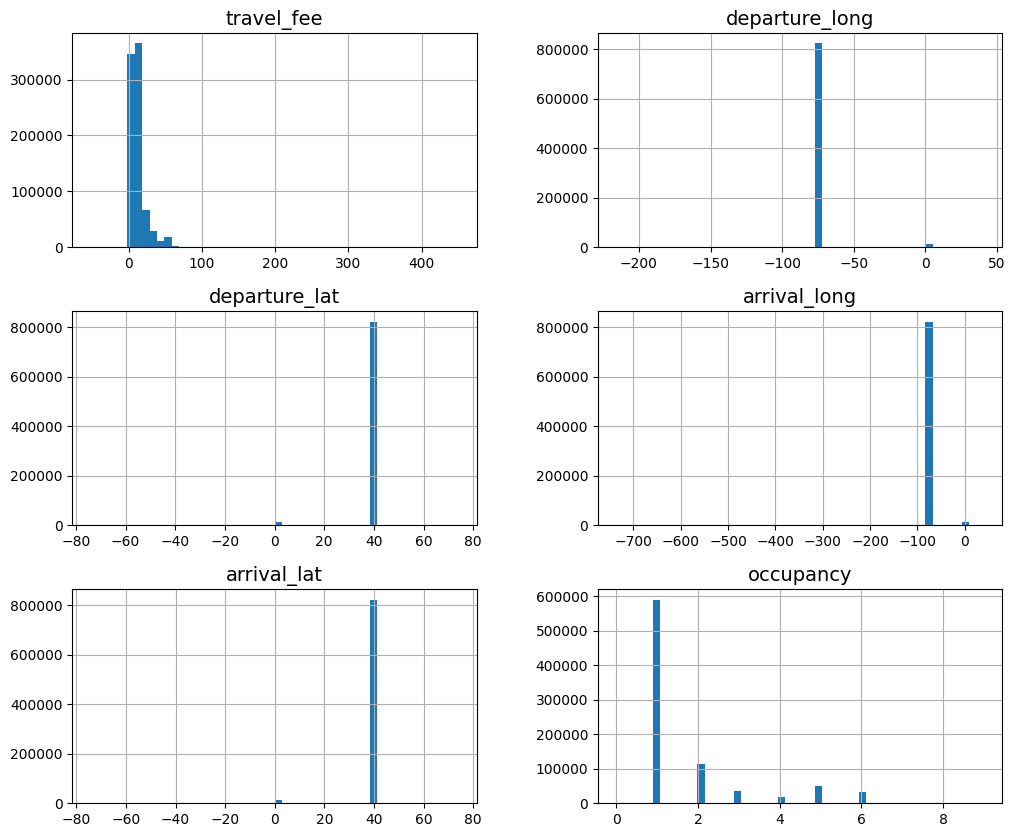

In [111]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

train_set = train_set.drop_duplicates()
train_set.hist( bins=50,figsize = (12,10))
plt.show()

## Analyze the Location for the departure and arrival

<Axes: xlabel='arrival_long', ylabel='arrival_lat'>

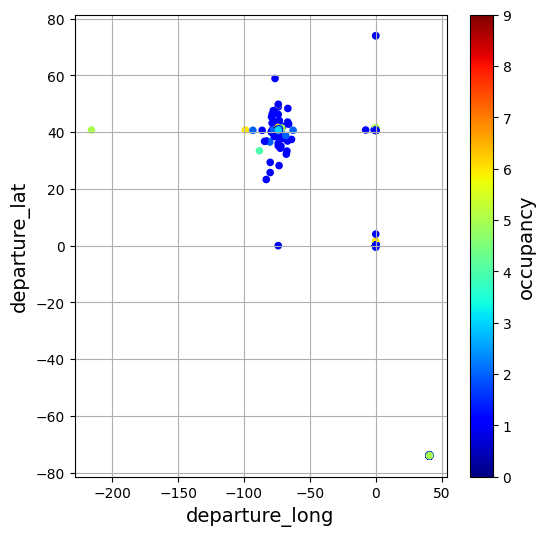

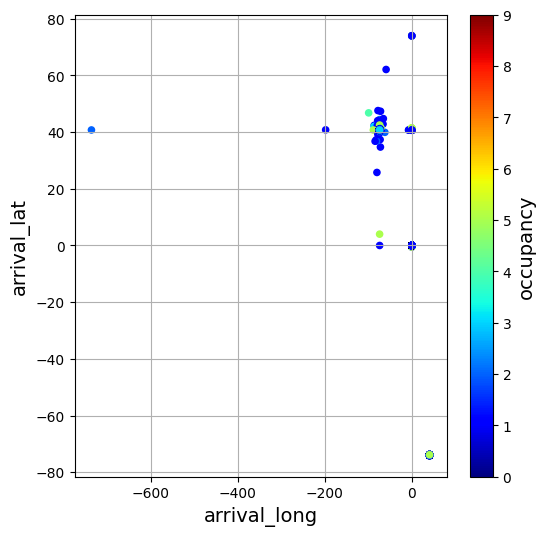

In [84]:
train_set.plot(
    kind="scatter", x="departure_long", y="departure_lat", grid=True,
    c="occupancy", cmap="jet", colorbar=True,
    legend=True, sharex=False, figsize=(6, 6)
)

train_set.plot(
    kind="scatter", x="arrival_long", y="arrival_lat", grid=True,
    c="occupancy", cmap="jet", colorbar=True,
    legend=True, sharex=False, figsize=(6, 6)
)

## Calculate the distance

In [112]:
DataSetWithDistance = train_set.dropna()
# remove the missing value row record
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers


    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])



    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c



    return distance





DataSetWithDistance['distance'] = DataSetWithDistance.apply(
    lambda row: haversine_distance(row['departure_lat'], row['departure_long'], row['arrival_lat'], row['arrival_long']),
    axis=1
)

print(DataSetWithDistance.head(10))
print(DataSetWithDistance.info())
print(DataSetWithDistance.describe())

<ipython-input-112-5888d29f2cdd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataSetWithDistance['distance'] = DataSetWithDistance.apply(


             ID  travel_fee             departure_time  departure_long  \
408561  12:00.0       34.83  2013-10-14 16:12:00+00:00      -73.966322   
70143   39:00.0        3.50  2013-04-08 11:39:00+00:00      -74.000820   
708782  38:05.0       10.00  2013-03-08 05:38:05+00:00      -73.971252   
572694  18:24.0       12.50  2013-01-16 19:18:24+00:00      -73.983960   
774181  29:31.0       10.00  2013-11-25 16:29:31+00:00      -73.982285   
486291  50:00.0       20.50  2013-12-11 10:50:00+00:00      -73.983277   
497533  48:11.0        9.00  2013-02-10 00:48:11+00:00      -73.981302   
780832  57:00.0        4.00  2013-11-08 14:57:00+00:00      -73.960050   
740249  39:00.0        9.50  2013-05-15 17:39:00+00:00      -73.972317   
18498   56:00.0        4.50  2013-11-24 03:56:00+00:00      -73.983698   

        departure_lat  arrival_long  arrival_lat  occupancy  distance  
408561      40.789487    -73.864072    40.769702          2  8.886077  
70143       40.728942    -73.997803    40

<Axes: xlabel='distance', ylabel='travel_fee'>

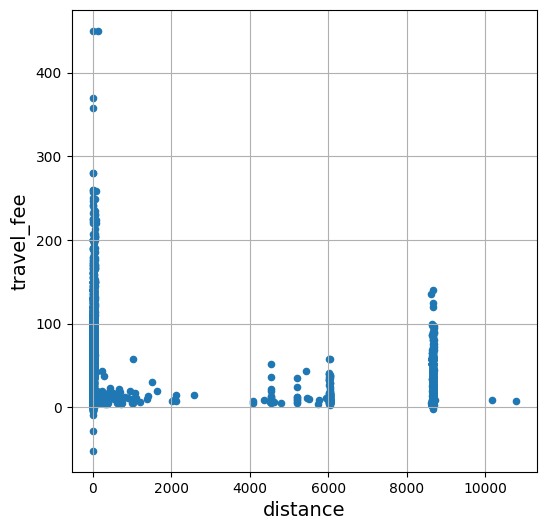

In [113]:
# Plotting using pandas and Matplotlib
DataSetWithDistance.plot(
    kind="scatter", x="distance", y="travel_fee", grid=True,
    legend=True, sharex=False, figsize=(6, 6)
)

In [119]:
import pandas as pd

# Assuming you have a DataFrame named DataSetWithDistance

# Convert departure_time column to Pandas datetime objects
DataSetWithDistance['departure_time'] = pd.to_datetime(DataSetWithDistance['departure_time'], errors='coerce')

# Define a custom function to categorize departure times into "Morning" and "Night"
def categorize_time(time):
    if 6 <= time.hour < 12:
        return 1  # Morning
    elif 18 <= time.hour <= 23 or 0 <= time.hour < 6:
        return 2  # Night
    else:
        return 0  # Other times

# Apply the custom function to create a new column 'departure_time_label'
DataSetWithDistance['departure_time_label'] = DataSetWithDistance['departure_time'].apply(categorize_time)

# Display the head of the DataFrame
print(DataSetWithDistance.head())



<ipython-input-119-0c48fd0e8017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataSetWithDistance['departure_time'] = pd.to_datetime(DataSetWithDistance['departure_time'], errors='coerce')


             ID  travel_fee            departure_time  departure_long  \
408561  12:00.0       34.83 2013-10-14 16:12:00+00:00      -73.966322   
70143   39:00.0        3.50 2013-04-08 11:39:00+00:00      -74.000820   
708782  38:05.0       10.00 2013-03-08 05:38:05+00:00      -73.971252   
572694  18:24.0       12.50 2013-01-16 19:18:24+00:00      -73.983960   
774181  29:31.0       10.00 2013-11-25 16:29:31+00:00      -73.982285   

        departure_lat  arrival_long  arrival_lat  occupancy  distance  \
408561      40.789487    -73.864072    40.769702          2  8.886077   
70143       40.728942    -73.997803    40.725665          1  0.444309   
708782      40.631838    -73.988857    40.610063          1  2.840839   
572694      40.721596    -73.977933    40.686762          1  3.906541   
774181      40.778839    -73.964681    40.769807          1  1.790551   

        departure_time_label  
408561                     0  
70143                      1  
708782                     2 

<ipython-input-119-0c48fd0e8017>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataSetWithDistance['departure_time_label'] = DataSetWithDistance['departure_time'].apply(categorize_time)


In [120]:
corr_matrix = DataSetWithDistance.corr()
corr_matrix["travel_fee"].sort_values(ascending = False)

<ipython-input-120-fc14d721dec5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = DataSetWithDistance.corr()


travel_fee              1.000000
distance                0.029231
arrival_long            0.019548
departure_long          0.017818
occupancy               0.011207
departure_lat          -0.014539
arrival_lat            -0.016039
departure_time_label   -0.021002
Name: travel_fee, dtype: float64

In [116]:
DataSetWithDistance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838850 entries, 408561 to 121958
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   ID                    838850 non-null  object             
 1   travel_fee            838850 non-null  float64            
 2   departure_time        838850 non-null  datetime64[ns, UTC]
 3   departure_long        838850 non-null  float64            
 4   departure_lat         838850 non-null  float64            
 5   arrival_long          838850 non-null  float64            
 6   arrival_lat           838850 non-null  float64            
 7   occupancy             838850 non-null  int64              
 8   distance              838850 non-null  float64            
 9   departure_time_label  838850 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(6), int64(2), object(1)
memory usage: 70.4+ MB


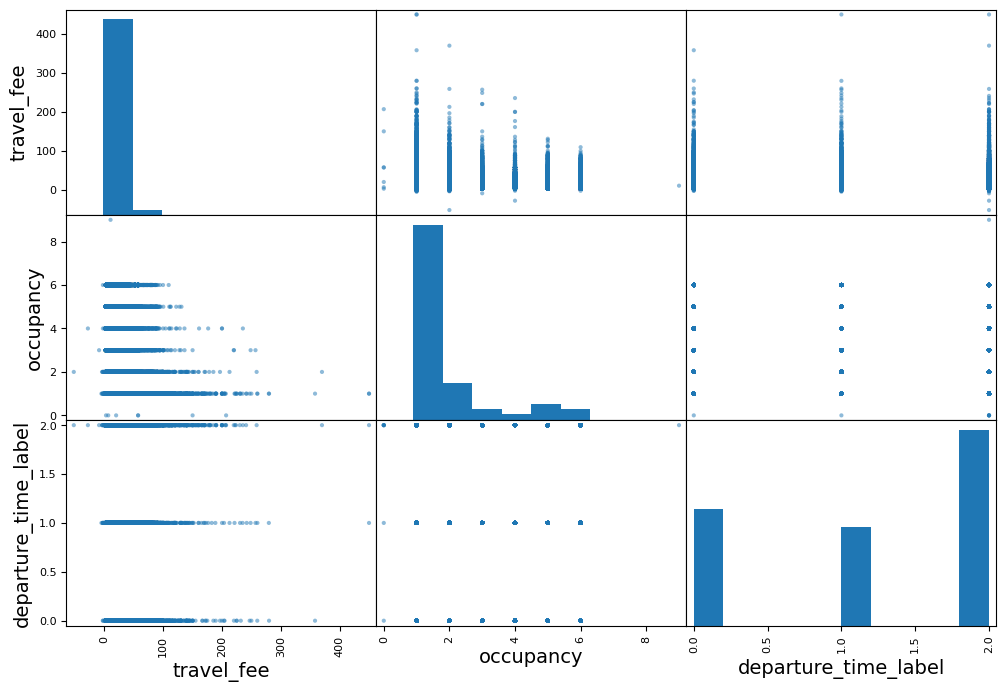

In [123]:
from pandas.plotting import scatter_matrix

attributes = ['travel_fee', 'occupancy','departure_time_label']
scatter_matrix(DataSetWithDistance[attributes], figsize=(12, 8))
plt.show()

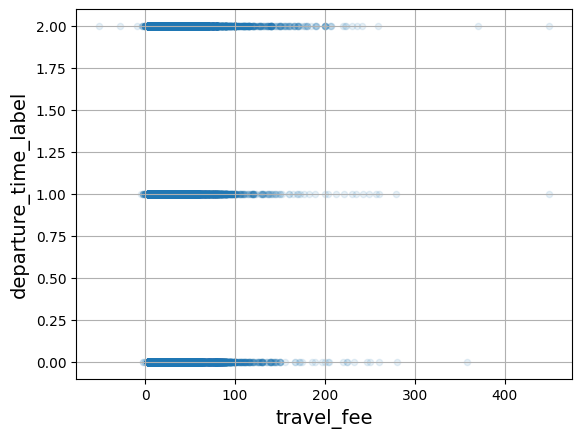

In [122]:
DataSetWithDistance.plot(kind="scatter", x="travel_fee", y="departure_time_label",
             alpha=0.1, grid=True)
plt.show()